<a href="https://colab.research.google.com/github/purnendux95/Space-cadet/blob/main/M9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#9.RESIZING/SCALING the IMAGE

import cv2
import numpy as np

img = cv2.imread('abc.jpg')#reading the image
cv2.imshow('ORIGINAL IMAGE',img)
cv2.waitKey(500)



#1.Let us scale down the image to 75%
img1 = cv2.resize(img,None,fx = 0.75,fy = 0.75)
cv2.imshow('SCALED DOWN IMAGE',img1)

#2.Let us scale up the image to 150%
img2 = cv2.resize(img,None,fx = 1.5,fy = 1.5)
cv2.imshow('SCALED UP IMAGE',img2)

#3.Scaling using custom dimensions
img3 = cv2.resize(img,(1000,400))
cv2.imshow('CUSTOM DIMENSIONS',img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#10.RECTANGLE/SQUARE

import cv2
import numpy as np

img = np.zeros((500,500,3)) #black background

#cv2.rectangle(src,point1,point2,color,thickness)
cv2.rectangle(img,(200,200),(400,400),(0,255,0),5)
cv2.imshow('RECTANGLE',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#11.LIVE VIDEO from the WEBCAM

import cv2

cap = cv2.VideoCapture(0) #0 here considers the default webcam port

while True:
    ret,frame = cap.read()#from the cap variable , we read the video
    #ret and frame are 2 variables to be considered
    #We only use frame variable , ret is dummy

    cv2.imshow('My Live Sketch',frame)
    if cv2.waitKey(1) == 13:
        break

cap.release() #It release the default webcam port 
cv2.destroyAllWindows()

In [ ]:
#12.MY CANNY(EDGE DETECTION TECHNIQUE) SKETCH

import cv2
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    canny = cv2.Canny(frame,20,150)#20,150 are the threshold values for best edge detection
    cv2.imshow('MY CANNY SKETCH',canny)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#FORECASTING - FB PROPHET
#FACEBOOK
#FORECASTING - PREDICTING SOMETHING W.R.T TIME
#1 quintal - 100 kgs

In [ ]:
#TAke the data and create dataframe
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [ ]:
df.info() #It gives us the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [ ]:
#TO officially check the null values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#TO remove the null value
df = df.dropna()

In [ ]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#The input to FB Prophet is always 2 columns - ds (relation with time) and y(prices)
#SO let us consider the date column and the Modal price column
#Let us rename the date column into ds and the Modal price column into y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [ ]:
#Now let us create a new dataframe with only ds and y columns
df_new = df[['ds','y']]
df_new

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [ ]:
#The columns ds and y , are not in desired datatype format
#We convert the ds column's datatype into datetime format
#We convert the y column's datatype into integer format
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


<ipython-input-9-dc3c5e53254e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ds'] = pd.to_datetime(df_new['ds'])
<ipython-input-9-dc3c5e53254e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['y'] = df_new['y'].astype(int)


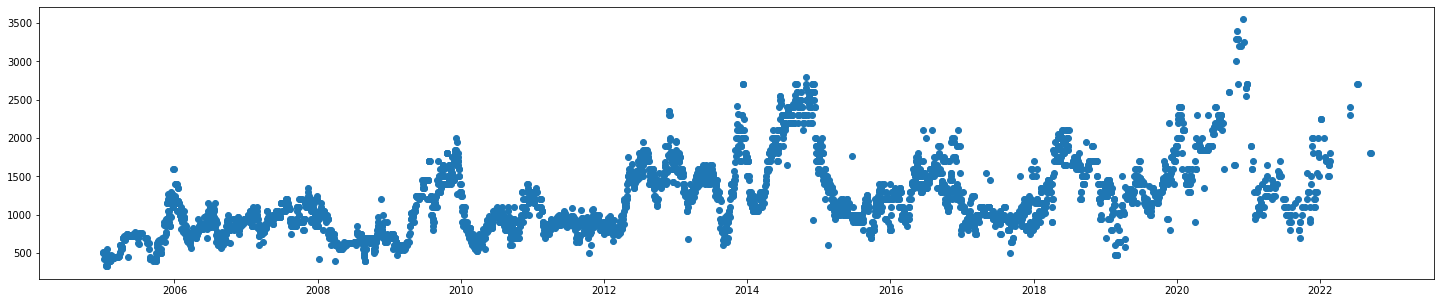

In [ ]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.figure(figsize = (25,5))
plt.scatter(df_new['ds'],df_new['y'])

In [ ]:
#FB PROPHET 
import prophet
op = prophet.Prophet()
op.fit(df_new)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssc3oebb/scyx8p9b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpssc3oebb/v_adnmc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94230', 'data', 'file=/tmp/tmpssc3oebb/scyx8p9b.json', 'init=/tmp/tmpssc3oebb/v_adnmc1.json', 'output', 'file=/tmp/tmpssc3oebb/prophet_model8p3u0gkn/prophet_model-20230112181247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = op.make_future_dataframe(periods = 700,freq = 'D')
forecast = op.predict(forecast)

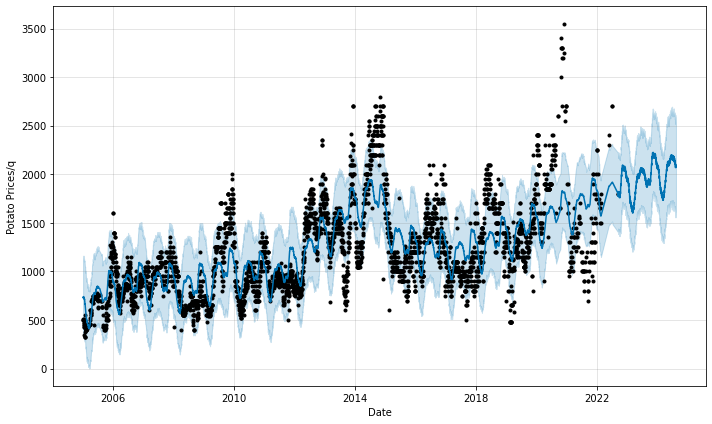

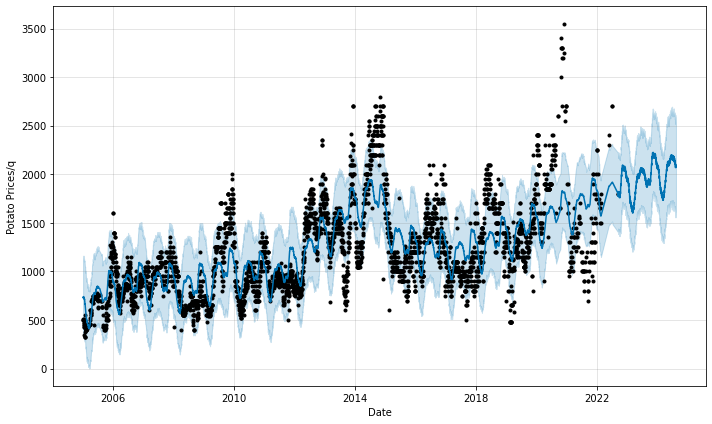

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Potato Prices/q')
#BLACK DOTS - ACTUAL POTATO PRICES 
#LIGHT BLUE SHADE - MINIMUM and MAXIMUM PRICES as PREDICTED BY OUR MODEL
#THE DARK BLUE LINE  - THE BEST FIT LINE